In [1]:
import argparse
import tensorflow as tf
from collections import deque
import numpy as np
import sys
sys.path.insert(0,'/home/users/rmth/stroke-deep-learning') 
sys.path.insert(0,'/home/users/rmth/') 
from datahandler import DataHandler
from models import CRNN as Model
from config import Config
from models import input_fn
import os

os.chdir('/home/users/rmth/')

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

In [2]:
cf = Config('r-c-shhs',
            'cluster',
            'revised-shallow-small',
            None).get_configs(cross_validate=None)

DataHandler.setup_partitions(config=cf,
                                 model_memory=False,
                                 cross_validate=None)

Removing existing model: /scratch/users/rmth/tf_logs/r-c-shhs_cluster_revised-shallow-small/


In [3]:
run_config = tf.estimator.RunConfig(save_checkpoints_steps=cf.eparams.save_checkpoint_steps,
                                        save_summary_steps=cf.eparams.save_summary_steps)
model = Model('CRNN', cf.eparams)
classifier = tf.estimator.Estimator(
        model_fn=lambda features, labels, mode: model(features, labels, mode, cf.hparams),
        model_dir=cf.eparams.ckptdir,
        config=run_config)

tf.logging.set_verbosity(tf.logging.INFO)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': None, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3693661490>, '_evaluation_master': '', '_save_checkpoints_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/scratch/users/rmth/tf_logs/r-c-shhs_cluster_revised-shallow-small/', '_global_id_in_cluster': 0, '_save_summary_steps': 100}


Doing iteration 0 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/r-c-shhs_cluster_revised-shallow-small/model.ckpt-300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 301 into /scratch/users/rmth/tf_logs/r-c-shhs_cluster_revised-shallow-small/model.ckpt.
INFO:tensorflow:loss = 1.35481, step = 300
INFO:tensorflow:Mode: train, Step: 0300, loss: 1.3548, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0325, loss: 1.2634, accuracy: 0.88
INFO:tensorflow:Mode: train, Step: 0350, loss: 1.2915, accuracy: 0.75
INFO:tensorflow:Mode: train, Step: 0375, loss: 1.3222, accuracy: 0.62
INFO:tensorflow:Saving checkpoints for 400 into /scratch/users/rmth/tf_logs/r-c-shhs_cluster_revised-shallow-small/model.ckpt.
INFO:tens

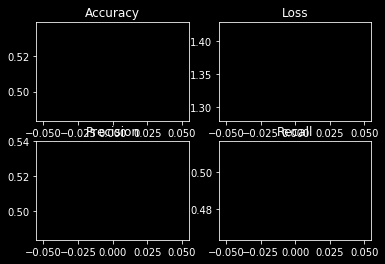

Doing iteration 1 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/r-c-shhs_cluster_revised-shallow-small/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 401 into /scratch/users/rmth/tf_logs/r-c-shhs_cluster_revised-shallow-small/model.ckpt.
INFO:tensorflow:loss = 1.3731, step = 400
INFO:tensorflow:Mode: train, Step: 0400, loss: 1.3731, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0425, loss: 1.3721, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0450, loss: 1.3165, accuracy: 0.62
INFO:tensorflow:Mode: train, Step: 0475, loss: 1.4091, accuracy: 0.25
INFO:tensorflow:Saving checkpoints for 500 into /scratch/users/rmth/tf_logs/r-c-shhs_cluster_revised-shallow-small/model.ckpt.
INFO:tenso

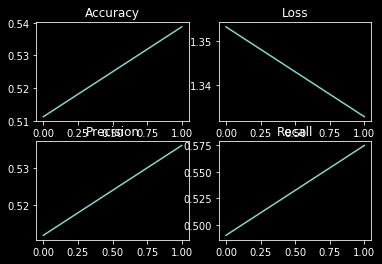

    Patience reduced to: 1
Doing iteration 2 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/r-c-shhs_cluster_revised-shallow-small/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 501 into /scratch/users/rmth/tf_logs/r-c-shhs_cluster_revised-shallow-small/model.ckpt.
INFO:tensorflow:loss = 1.33429, step = 500
INFO:tensorflow:Mode: train, Step: 0500, loss: 1.3343, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0525, loss: 1.3230, accuracy: 0.62
INFO:tensorflow:Mode: train, Step: 0550, loss: 1.3085, accuracy: 0.50
INFO:tensorflow:Mode: train, Step: 0575, loss: 1.3442, accuracy: 0.25
INFO:tensorflow:Saving checkpoints for 600 into /scratch/users/rmth/tf_logs/r-c-shhs_cluster_revised-shallow-

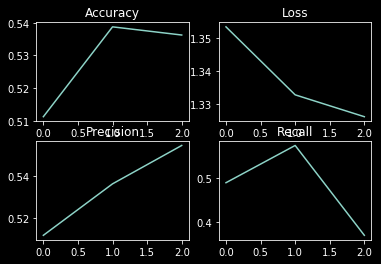

    Reached early stopping criterion at 3 iterations.


In [5]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
loss_buffer_size = 5
smoothed_loss_values = np.ones([2])

test_accuracies = []
test_losses = []
test_precision = []
test_recall = []

tolerance = 1e0 #1e-2
early_stop_criterion = False
iteration = 0
max_steps = 1e4
train_steps = 100
eval_steps = 100
min_iterations = 2
max_iterations = max_steps // train_steps
patience = 2
while True:
    print('Doing iteration {} of train and eval steps.'.format(iteration))
    
    print('Training:')
    classifier.train(input_fn=lambda: input_fn('train', cf.eparams), steps=train_steps)
    
    print('Evaluation:')
    eval_results = classifier.evaluate(input_fn=lambda: input_fn('val', cf.eparams), steps=eval_steps)
    print('Evaluational loss result: {}.'.format(eval_results['loss']))

    if iteration == 0:
        l = deque(eval_results['loss']*np.ones([loss_buffer_size]))
    
    test_accuracies.append(eval_results['accuracy'])
    test_losses.append(eval_results['loss'])
    test_precision.append(eval_results['precision'])
    test_recall.append(eval_results['recall'])
    
    smoothed_loss_values[0] = np.mean(l)
    l.popleft()
    l.append(eval_results['loss'])
    smoothed_loss_values[1] = np.mean(l)
    iteration += 1
    
    print('    Loss  deque: {}'.format(l))
    print('    Smoothed loss values: {}'.format(smoothed_loss_values))
    
    fig, ax = plt.subplots(2, 2)
    ax[0, 0].plot(test_accuracies)
    ax[0, 0].set_title('Accuracy')
    ax[0, 1].plot(test_losses)
    ax[0, 1].set_title('Loss')
    ax[1, 0].plot(test_precision)
    ax[1, 0].set_title('Precision')
    ax[1, 1].plot(test_recall)
    ax[1, 1].set_title('Recall')
    plt.show()
    
    if iteration < min_iterations:
        continue
    early_stop_criterion = (smoothed_loss_values[1]-smoothed_loss_values[0]) > -tolerance
    if early_stop_criterion:
        patience -= 1
        if patience == 0:
            print('    Reached early stopping criterion at {} iterations.'.format(iteration))
            break
        else:
            print('    Patience reduced to: {}'.format(patience))
    elif patience < 2:
        patience += 1
        
    if iteration > max_iterations:
        print('    Reached maximum iterations.')

In [9]:
print 1.34374042-1.34919586
print -1e-2

-0.00545544
-0.01
